### Libraries

In [12]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from plotly.subplots import make_subplots

### Upload Dataset

In [13]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..', 'data', '01_raw','spotify.csv')

# Load the CSV file
spotify = pd.read_csv(ruta_csv_relativa)

Logistic regression model to predict whether a song is "popular"

In [14]:
# Clear the data (remove rows with null values)
spotify.dropna(inplace=True)

# Define a dependent variable (example: popularity > 50)
spotify['popular'] = (spotify['popularity'] > 50).astype(int)

# Select the independent variables (numeric data only)
X = spotify[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 
              'mode', 'speechiness', 'acousticness', 'instrumentalness', 
              'liveness', 'valence', 'tempo', 'time_signature']]

#Define the dependent variable
y = spotify['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create and train the model
model = LogisticRegression(max_iter=2000) # Increase to 2000 iterations
model.fit(X_train_scaled, y_train)

#Make predictions
y_pred = model.predict(X_test_scaled)

#Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17308     5]
 [ 5480     7]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     17313
           1       0.58      0.00      0.00      5487

    accuracy                           0.76     22800
   macro avg       0.67      0.50      0.43     22800
weighted avg       0.72      0.76      0.66     22800



### Linear Regression (Diego)

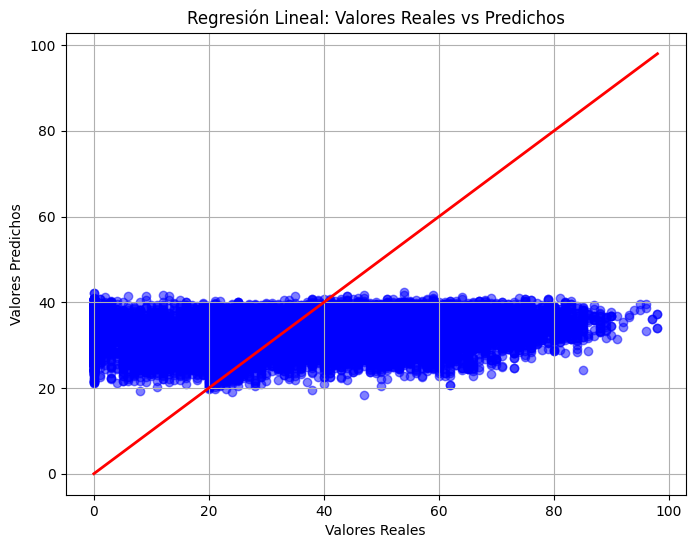

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Seleccionar características para el modelo de regresión
X = spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = spotify['popularity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir usando el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

# Gráfico de dispersión para la Regresión Lineal
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Regresión Lineal: Valores Reales vs Predichos")
plt.grid(True)
plt.show()


###  Regresion (Diego)

### Logistic Regression (Diego)

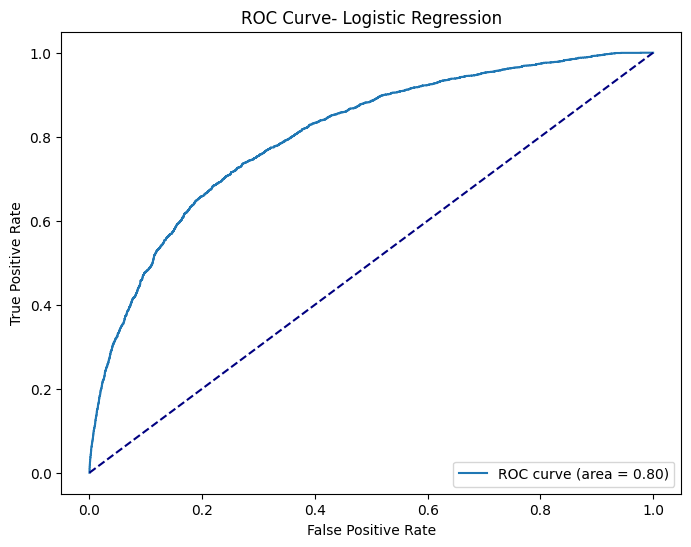

In [18]:
#Preprocessing: Selection of relevant numerical variables
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

#Target and predictor variables
X = spotify[features]
y = spotify['explicit'].astype(int) # We convert the 'explicit' variable into binary (0 or 1)

#Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Logistic regression model training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Predictions
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

#ROC Curve Generation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#Graph Generation
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Clasificación